In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
pd.read_csv("./sms-spam.csv")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
x = pd.read_csv("./sms-spam.csv")

In [7]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


In [8]:
x = pd.read_csv("sms-spam.csv")

In [9]:
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [10]:
x.rename(columns={'v1': 'result', 'v2': 'input'}, inplace=True)

In [11]:
encoder = LabelEncoder()
x['result'] = encoder.fit_transform(x['result'])
x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
x.duplicated().sum()

np.int64(403)

In [13]:
x = x.drop_duplicates(keep='first')

In [14]:
x['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x193b5101cd0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

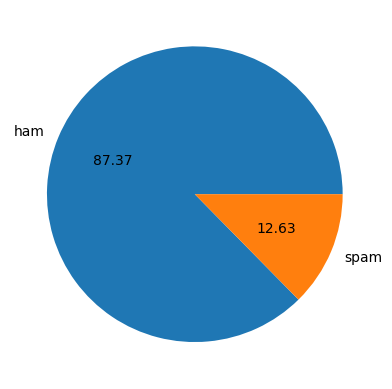

In [15]:
plt.pie(x['result'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')                                

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import nltk

In [18]:
x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))

In [19]:
x['countSentences'] = x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))

In [24]:
x['countCharacter'] = x['input'].apply(len)


In [25]:
x[['countSentences', 'countWords', 'countCharacter']].describe()

,countSentences,countWords,countCharacter
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


In [26]:
x[x['result'] == 1][['countSentences', 'countWords', 'countCharacter']].describe()

,countSentences,countWords,countCharacter
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [27]:
x[x['result'] == 0][['countSentences', 'countWords', 'countCharacter']].describe()

,countSentences,countWords,countCharacter
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


<Axes: xlabel='countCharacter', ylabel='Count'>

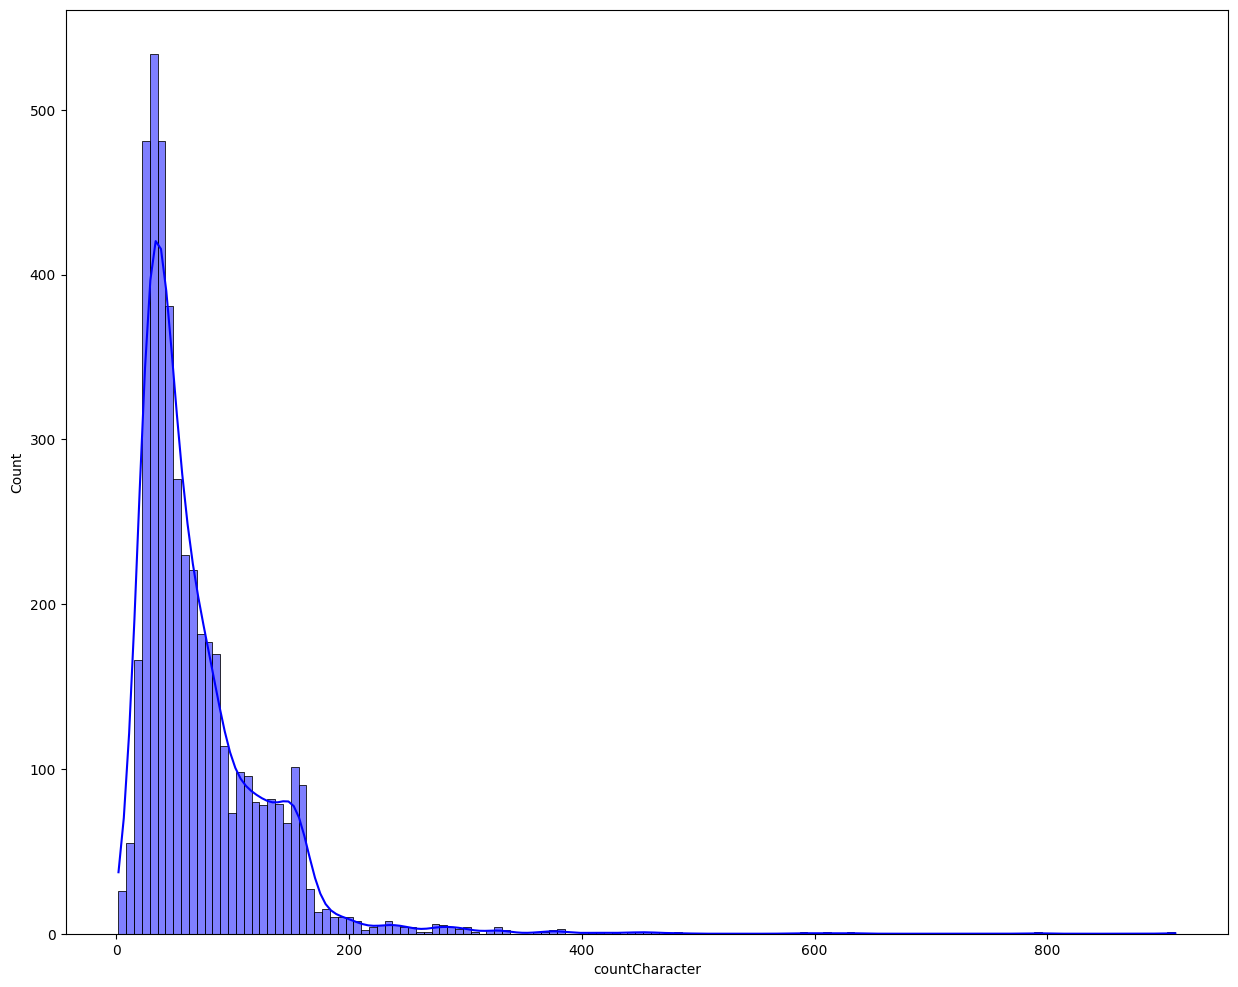

In [28]:
plt.figure(figsize=(15, 12))
sns.histplot(x[x['result'] == 0]['countCharacter'], color='blue', label='Ham', kde=True)

<Axes: xlabel='countCharacter', ylabel='Count'>

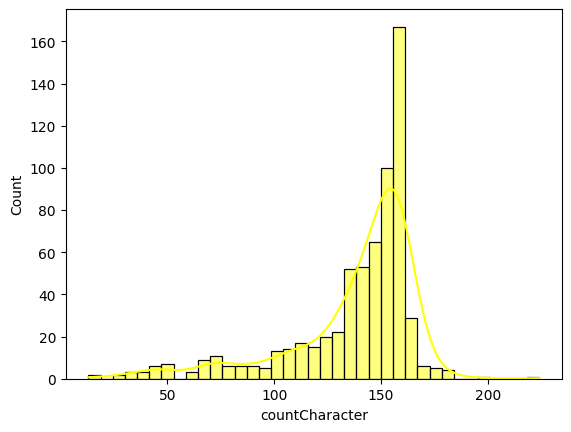

In [29]:
sns.histplot(x[x['result'] == 1]['countCharacter'], color='yellow', label='Ham', kde=True)

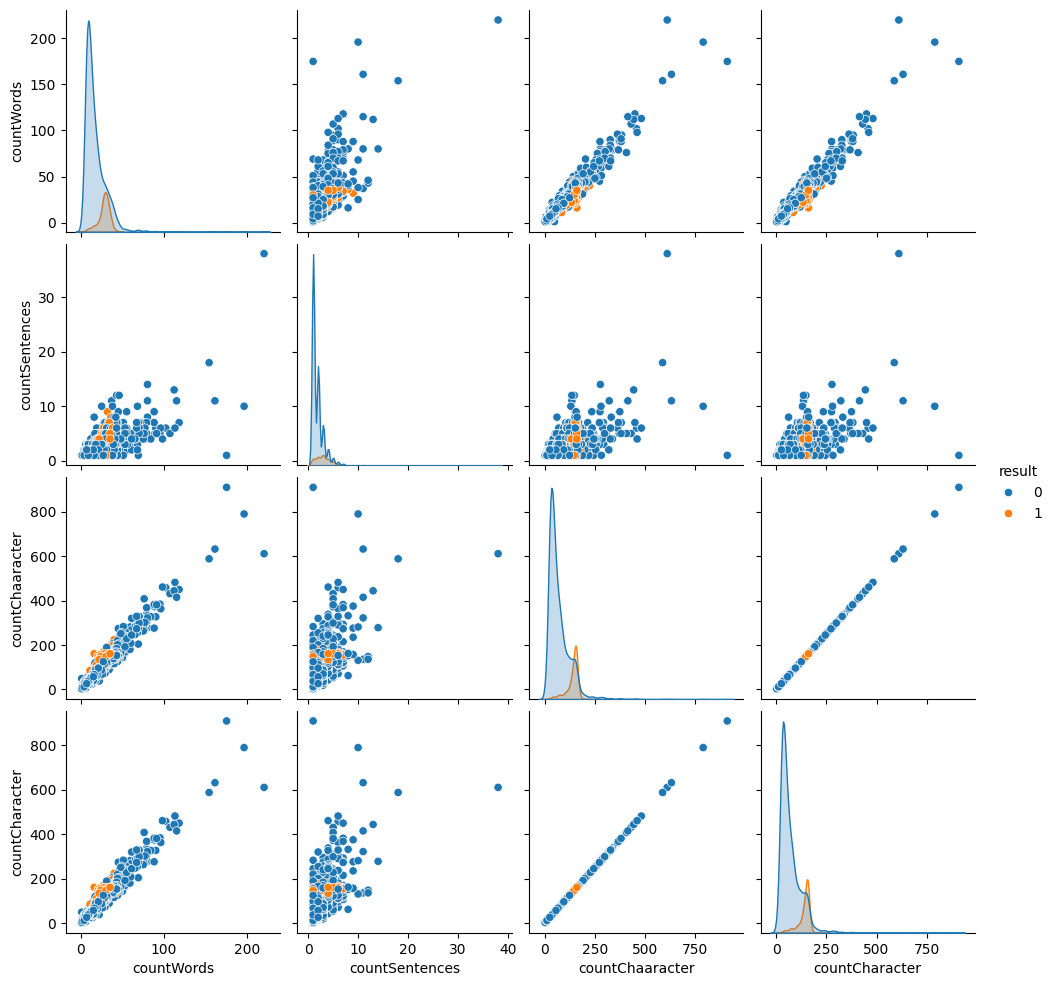

In [30]:
sns.pairplot(x, hue='result')

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    removedSC = list()
    for i in text:
        if i.isalnum():
           removedSC.append(i)
    text = removedSC[:]
    removedSWPC = list()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        removedSWPC.append(i)
    text = removedSWPC[:]
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
      stemmed.append(ps.stem(i))
    return " ".join(stemmed)


In [33]:
x['processed'] = x['input'].apply(transform_text)

In [34]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(x[x['result'] == 1]['processed'].str.cat(sep=' '))

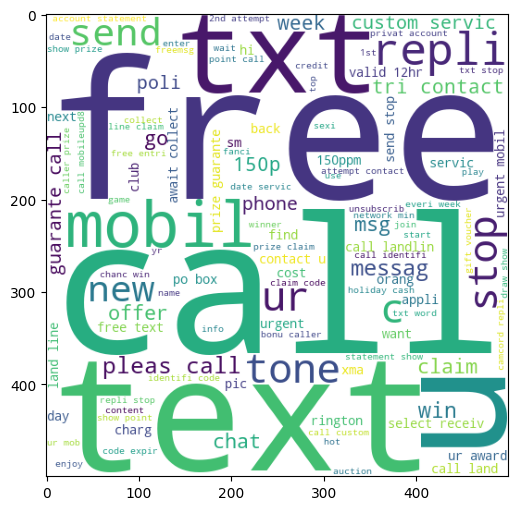

In [35]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

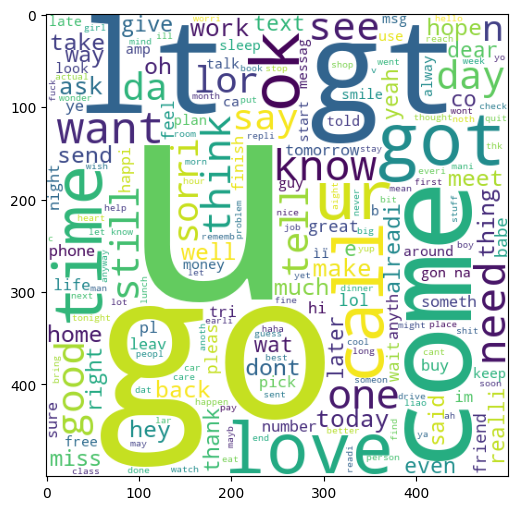

In [36]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(x[x['result'] == 0]['processed'].str.cat(sep=' '))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [37]:
spamWords = list()
for msg in x[x['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)
spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [38]:
spamWordsDictionary = Counter(spamWords)
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [39]:
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

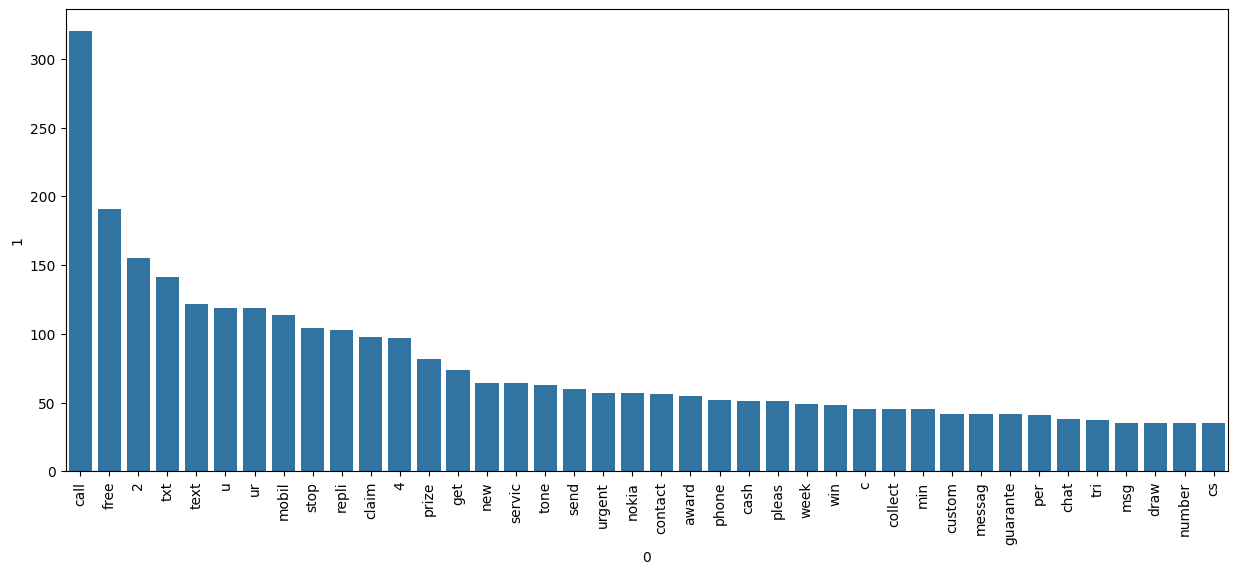

In [40]:
plt.figure(figsize=(15, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
cv = CountVectorizer()

In [42]:
X = cv.fit_transform(x['processed']).toarray()
X.shape

(5169, 6708)

In [43]:
y = x['result'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [45]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [47]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [48]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [49]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [50]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))